<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/Basics/Shallow_CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Key Details 
```
    DataSet: CIFAR10 from inbuilt in Keras
    Deep learning Framework: Tensorflow with Keras
    Deep learning Method: Fully Connected And Convolution
    Optimizer:SGD with 0.01
    Results: 56 to 60 % Accurate
    Total Parameters : 327690 Less than the FC_cifar10
    Total Convolution Layer : 1
```
#### Done by shriarul643@gmail.com

Import all necessary Packages all 


In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import  cifar10
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import numpy as np  
from matplotlib import  pyplot as plt

Load the cifar10 data from the Keras

In [2]:
(trainData,trainLabel),(testData,testLabel) = cifar10.load_data()
print(trainData.shape)
print(testData.shape)
print(trainLabel.shape)
print(testLabel.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [3]:
Targetlabel = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

PreProcessing the data.</br>
Transform Label into Binaries of the format [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] </br>

In [4]:
trainData = trainData/255.0
testData =  testData/255.0

le = LabelBinarizer()
trainLabel = le.fit_transform(trainLabel)
testLabel = le.fit_transform(testLabel)

Construct a CNN model with :</br>
INPUT => CONV => RELU => FC as the architecture of the CNN

In [26]:
model = Sequential([Conv2D(60,(3,3),padding='same',input_shape=(32,32,3)),
                    Activation('relu'),
                    Flatten(),
                    Dense(10,activation='softmax')])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 60)        1680      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 60)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61440)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                614410    
Total params: 616,090
Trainable params: 616,090
Non-trainable params: 0
_________________________________________________________________


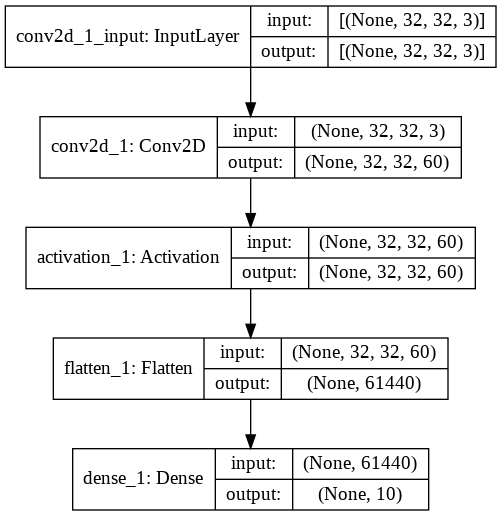

In [28]:
plot_model(model,show_shapes=True)

In [29]:
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [30]:
H = model.fit(trainData,trainLabel,batch_size=32,epochs=25,validation_data=(testData,testLabel))

Epoch 1/25
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9403 - accuracy: 0.3082 - val_loss: 1.6520 - val_accuracy: 0.4194
Epoch 2/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5828 - accuracy: 0.4510 - val_loss: 1.4534 - val_accuracy: 0.4907
Epoch 3/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3996 - accuracy: 0.5121 - val_loss: 1.4707 - val_accuracy: 0.4770
Epoch 4/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2994 - accuracy: 0.5494 - val_loss: 1.2724 - val_accuracy: 0.5537
Epoch 5/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2379 - accuracy: 0.5678 - val_loss: 1.2617 - val_accuracy: 0.5576
Epoch 6/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1941 - accuracy: 0.5858 - val_loss: 1.3205 - val_accuracy: 0.5265
Epoch 7/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1555 - accuracy: 0.6007 - val_loss: 1.2441 - val_accuracy:

In [17]:
_,acc = model.evaluate(testData,testLabel)
print('Accuracy is {:.2f}%'.format(acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.3120 - accuracy: 0.5870
Accuracy is 58.70%


In [31]:
plt.style.use('ggplot')

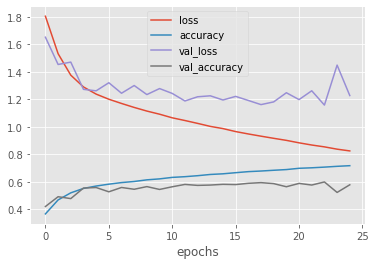

In [33]:
plt.figure()
plt.plot(np.arange(0,25),H.history['loss'],label='loss')
plt.plot(np.arange(0,25),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(0,25),H.history['val_loss'],label='val_loss')
plt.plot(np.arange(0,25),H.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [34]:
predicted = model.predict(testData)

In [35]:
print(classification_report(testLabel.argmax(axis=1),predicted.argmax(axis=1),target_names=Targetlabel))

              precision    recall  f1-score   support

    airplane       0.52      0.80      0.63      1000
  automobile       0.74      0.71      0.72      1000
        bird       0.53      0.34      0.41      1000
         cat       0.39      0.48      0.43      1000
        deer       0.43      0.62      0.51      1000
         dog       0.53      0.46      0.49      1000
        frog       0.80      0.49      0.61      1000
       horse       0.61      0.71      0.66      1000
        ship       0.84      0.54      0.66      1000
       truck       0.70      0.63      0.66      1000

    accuracy                           0.58     10000
   macro avg       0.61      0.58      0.58     10000
weighted avg       0.61      0.58      0.58     10000



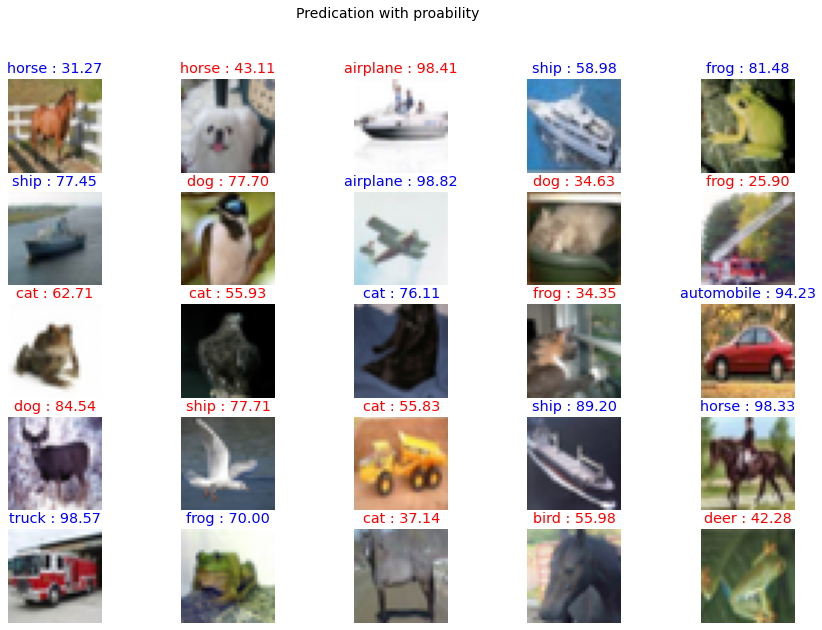

In [36]:
RandomIndex = np.random.randint(0,len(testData),size=(25,))
plt.figure(figsize=(15,10))
for i,j in enumerate(RandomIndex):
  plt.subplot(5,5,i+1)
  plt.imshow(testData[j].reshape(32,32,3),cmap=plt.cm.binary)
  plt.axis('off')
  predictedLabel = np.argmax(predicted[j])
  actualLabel = np.argmax(testLabel[j])
  if predictedLabel == actualLabel:
    color = 'blue'
  else :
    color = 'red'
  plt.title('{} : {:.2f}'.format(Targetlabel[predictedLabel],predicted[j].max()*100),color=color)
plt.suptitle('Predication with proability',fontsize=14)
plt.show()